<a href="https://colab.research.google.com/github/taka7peace/portfolio_7/blob/main/intern_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Explore, Cleaning

##Let's read all the data

##Let's list file names in a folder

In [ ]:
import os
current_dir = os.getcwd()
current_dir

'/content'

In [ ]:
os.listdir(current_dir)

['.config',
 'tbl_order_202003.csv',
 'tbl_order_201907.csv',
 'tbl_order_201911.csv',
 'tbl_order_201904.csv',
 'tbl_order_202002.csv',
 '6章_機械学習のためのデータ加工をする10本ノック_answer.ipynb',
 'data',
 'tbl_order_201910.csv',
 'drive',
 'tbl_order_201912.csv',
 'm_store.csv',
 'tbl_order_202001.csv',
 'tbl_order_201906.csv',
 'm_area.csv',
 'tbl_order_201909.csv',
 '1章_分析に向けた準備を行う10本ノック_answer.ipynb',
 'tbl_order_201908.csv',
 'tbl_order_201905.csv',
 'sample_data']

In [ ]:
import glob
tbl_order_files = glob.glob(tbl_order_file)
tbl_order_files

['/content/tbl_order_202003.csv',
 '/content/tbl_order_201907.csv',
 '/content/tbl_order_201911.csv',
 '/content/tbl_order_201904.csv',
 '/content/tbl_order_202002.csv',
 '/content/tbl_order_201910.csv',
 '/content/tbl_order_201912.csv',
 '/content/tbl_order_202001.csv',
 '/content/tbl_order_201906.csv',
 '/content/tbl_order_201909.csv',
 '/content/tbl_order_201908.csv',
 '/content/tbl_order_201905.csv']

In [ ]:
tbl_order_file = os.path.join(current_dir, 'tbl_order_*.csv')
tbl_order_file

'/content/tbl_order_*.csv'

Let's merge (union) multiple data

In [ ]:
order_all = pd.DataFrame()
for file in tbl_order_files:
    order_data = pd.read_csv(file)
    print(f'{file}:{len(order_data)}')
    order_all = pd.concat([order_all, order_data], ignore_index=True)

/content/tbl_order_202003.csv:241087
/content/tbl_order_201907.csv:240976
/content/tbl_order_201911.csv:233191
/content/tbl_order_201904.csv:233393
/content/tbl_order_202002.csv:225564
/content/tbl_order_201910.csv:241060
/content/tbl_order_201912.csv:241052
/content/tbl_order_202001.csv:241049
/content/tbl_order_201906.csv:233295
/content/tbl_order_201909.csv:233215
/content/tbl_order_201908.csv:241122
/content/tbl_order_201905.csv:241041


##Let's check the statistics of data

In [ ]:
order_all.isnull().sum()

order_id             0
store_id             0
customer_id          0
coupon_cd            0
sales_detail_id      0
order_accept_date    0
delivered_date       0
takeout_flag         0
total_amount         0
status               0
dtype: int64

In [ ]:
order_all.describe()

,order_id,store_id,coupon_cd,sales_detail_id,takeout_flag,total_amount,status
count,2.846045e+06,2.846045e+06,2.846045e+06,2.846045e+06,2.846045e+06,2.846045e+06,2.846045e+06
mean,5.002053e+07,1.039444e+02,4.951014e+01,5.002545e+07,2.595865e-01,2.960625e+03,3.080961e+00
std,2.887013e+07,8.646195e+01,2.887350e+01,2.886417e+07,4.384078e-01,9.542898e+02,2.834313e+00
min,2.200000e+01,1.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00,6.980000e+02,1.000000e+00
25%,2.502766e+07,5.100000e+01,2.500000e+01,2.502913e+07,0.000000e+00,2.308000e+03,2.000000e+00
50%,5.003842e+07,9.900000e+01,4.900000e+01,5.004128e+07,0.000000e+00,2.808000e+03,2.000000e+00
75%,7.503312e+07,1.480000e+02,7.500000e+01,7.504374e+07,1.000000e+00,3.617000e+03,2.000000e+00
max,9.999998e+07,9.990000e+02,9.900000e+01,9.999996e+07,1.000000e+00,5.100000e+03,9.000000e+00


In [ ]:
order_all['total_amount'].describe()

count    2.846045e+06
mean     2.960625e+03
std      9.542898e+02
min      6.980000e+02
25%      2.308000e+03
50%      2.808000e+03
75%      3.617000e+03
max      5.100000e+03
Name: total_amount, dtype: float64

In [ ]:
print(order_all["order_accept_date"].min())
print(order_all["order_accept_date"].max())
print(order_all["delivered_date"].min())
print(order_all["delivered_date"].max())

2019-04-01 11:00:00
2020-03-31 21:58:58
2019-04-01 11:10:00
2020-03-31 22:55:56


##Let's exclude unnecessary data

In [ ]:
order_data = order_all.loc[order_all['store_id'] != 999]
order_data

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status
0,98632919,149,C32180552,60,58306418,2020-03-01 11:00:00,2020-03-01 11:36:00,1,2677,9
1,58365678,30,C24307399,52,6981016,2020-03-01 11:00:00,2020-03-01 11:47:00,0,3234,2
2,24932966,23,C65561395,12,85886484,2020-03-01 11:00:00,2020-03-01 11:16:00,0,2987,2
3,49670812,75,C31890729,4,4672064,2020-03-01 11:00:00,2020-03-01 11:37:00,0,3617,2
4,98992853,93,C72777249,53,86705367,2020-03-01 11:00:00,2020-03-01 11:20:00,0,1882,9
...,...,...,...,...,...,...,...,...,...,...
2846040,35554956,149,C02673880,39,40167842,2019-05-31 21:58:58,2019-05-31 22:08:58,0,1899,2
2846041,2092420,110,C64070233,2,23294670,2019-05-31 21:58:58,2019-05-31 22:40:58,0,3050,2
2846042,58413474,134,C05032055,97,69176975,2019-05-31 21:58:58,2019-05-31 22:38:58,1,4133,1
2846043,90754113,11,C84085721,28,32878469,2019-05-31 21:58:58,2019-05-31 22:42:58,1,3838,1


Let's Join Master Data

In [ ]:
m_area = pd.read_csv('m_area.csv')
m_area
m_store= pd.read_csv('m_store.csv')
m_store

,store_id,store_name,area_cd
0,1,昭島店,TK
1,2,あきる野店,TK
2,3,足立店,TK
3,4,北千住店,TK
4,5,綾瀬店,TK
...,...,...,...
192,193,桐生店,GU
193,194,高崎店,GU
194,195,館林店,GU
195,196,前橋店,GU


In [ ]:
order_data = pd.merge(order_data, m_store, on='store_id', how='left')
order_data

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd
0,98632919,149,C32180552,60,58306418,2020-03-01 11:00:00,2020-03-01 11:36:00,1,2677,9,松戸店,CH
1,58365678,30,C24307399,52,6981016,2020-03-01 11:00:00,2020-03-01 11:47:00,0,3234,2,品川店,TK
2,24932966,23,C65561395,12,85886484,2020-03-01 11:00:00,2020-03-01 11:16:00,0,2987,2,江東店,TK
3,49670812,75,C31890729,4,4672064,2020-03-01 11:00:00,2020-03-01 11:37:00,0,3617,2,福生店,TK
4,98992853,93,C72777249,53,86705367,2020-03-01 11:00:00,2020-03-01 11:20:00,0,1882,9,小田原店,KN
...,...,...,...,...,...,...,...,...,...,...,...,...
2830625,35554956,149,C02673880,39,40167842,2019-05-31 21:58:58,2019-05-31 22:08:58,0,1899,2,松戸店,CH
2830626,2092420,110,C64070233,2,23294670,2019-05-31 21:58:58,2019-05-31 22:40:58,0,3050,2,藤沢店,KN
2830627,58413474,134,C05032055,97,69176975,2019-05-31 21:58:58,2019-05-31 22:38:58,1,4133,1,浦安店,CH
2830628,90754113,11,C84085721,28,32878469,2019-05-31 21:58:58,2019-05-31 22:42:58,1,3838,1,江戸川店,TK


In [ ]:
order_data = pd.merge(order_data, m_area, on='area_cd', how='left')
order_data

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area
0,98632919,149,C32180552,60,58306418,2020-03-01 11:00:00,2020-03-01 11:36:00,1,2677,9,松戸店,CH,千葉,千葉
1,58365678,30,C24307399,52,6981016,2020-03-01 11:00:00,2020-03-01 11:47:00,0,3234,2,品川店,TK,東京,東京
2,24932966,23,C65561395,12,85886484,2020-03-01 11:00:00,2020-03-01 11:16:00,0,2987,2,江東店,TK,東京,東京
3,49670812,75,C31890729,4,4672064,2020-03-01 11:00:00,2020-03-01 11:37:00,0,3617,2,福生店,TK,東京,東京
4,98992853,93,C72777249,53,86705367,2020-03-01 11:00:00,2020-03-01 11:20:00,0,1882,9,小田原店,KN,神奈川,神奈川
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830625,35554956,149,C02673880,39,40167842,2019-05-31 21:58:58,2019-05-31 22:08:58,0,1899,2,松戸店,CH,千葉,千葉
2830626,2092420,110,C64070233,2,23294670,2019-05-31 21:58:58,2019-05-31 22:40:58,0,3050,2,藤沢店,KN,神奈川,神奈川
2830627,58413474,134,C05032055,97,69176975,2019-05-31 21:58:58,2019-05-31 22:38:58,1,4133,1,浦安店,CH,千葉,千葉
2830628,90754113,11,C84085721,28,32878469,2019-05-31 21:58:58,2019-05-31 22:42:58,1,3838,1,江戸川店,TK,東京,東京


##Let's set a name to the code which master does not exist.

In [ ]:
order_data.loc[order_data['takeout_flag'] == 0, 'takeout_name'] = 'デリバリー'
order_data.loc[order_data['takeout_flag'] == 1, 'takeout_name'] = 'お持ち帰り'
order_data

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name
0,98632919,149,C32180552,60,58306418,2020-03-01 11:00:00,2020-03-01 11:36:00,1,2677,9,松戸店,CH,千葉,千葉,お持ち帰り
1,58365678,30,C24307399,52,6981016,2020-03-01 11:00:00,2020-03-01 11:47:00,0,3234,2,品川店,TK,東京,東京,デリバリー
2,24932966,23,C65561395,12,85886484,2020-03-01 11:00:00,2020-03-01 11:16:00,0,2987,2,江東店,TK,東京,東京,デリバリー
3,49670812,75,C31890729,4,4672064,2020-03-01 11:00:00,2020-03-01 11:37:00,0,3617,2,福生店,TK,東京,東京,デリバリー
4,98992853,93,C72777249,53,86705367,2020-03-01 11:00:00,2020-03-01 11:20:00,0,1882,9,小田原店,KN,神奈川,神奈川,デリバリー
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830625,35554956,149,C02673880,39,40167842,2019-05-31 21:58:58,2019-05-31 22:08:58,0,1899,2,松戸店,CH,千葉,千葉,デリバリー
2830626,2092420,110,C64070233,2,23294670,2019-05-31 21:58:58,2019-05-31 22:40:58,0,3050,2,藤沢店,KN,神奈川,神奈川,デリバリー
2830627,58413474,134,C05032055,97,69176975,2019-05-31 21:58:58,2019-05-31 22:38:58,1,4133,1,浦安店,CH,千葉,千葉,お持ち帰り
2830628,90754113,11,C84085721,28,32878469,2019-05-31 21:58:58,2019-05-31 22:42:58,1,3838,1,江戸川店,TK,東京,東京,お持ち帰り


In [ ]:
order_data.loc[order_data['status'] == 0, 'status_name'] = '受付'
order_data.loc[order_data['status'] == 1, 'status_name'] = 'お支払済'
order_data.loc[order_data['status'] == 2, 'status_name'] = 'お渡し済'
order_data.loc[order_data['status'] == 9, 'status_name'] = 'キャンセル'
order_data

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
0,98632919,149,C32180552,60,58306418,2020-03-01 11:00:00,2020-03-01 11:36:00,1,2677,9,松戸店,CH,千葉,千葉,お持ち帰り,キャンセル
1,58365678,30,C24307399,52,6981016,2020-03-01 11:00:00,2020-03-01 11:47:00,0,3234,2,品川店,TK,東京,東京,デリバリー,お渡し済
2,24932966,23,C65561395,12,85886484,2020-03-01 11:00:00,2020-03-01 11:16:00,0,2987,2,江東店,TK,東京,東京,デリバリー,お渡し済
3,49670812,75,C31890729,4,4672064,2020-03-01 11:00:00,2020-03-01 11:37:00,0,3617,2,福生店,TK,東京,東京,デリバリー,お渡し済
4,98992853,93,C72777249,53,86705367,2020-03-01 11:00:00,2020-03-01 11:20:00,0,1882,9,小田原店,KN,神奈川,神奈川,デリバリー,キャンセル
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830625,35554956,149,C02673880,39,40167842,2019-05-31 21:58:58,2019-05-31 22:08:58,0,1899,2,松戸店,CH,千葉,千葉,デリバリー,お渡し済
2830626,2092420,110,C64070233,2,23294670,2019-05-31 21:58:58,2019-05-31 22:40:58,0,3050,2,藤沢店,KN,神奈川,神奈川,デリバリー,お渡し済
2830627,58413474,134,C05032055,97,69176975,2019-05-31 21:58:58,2019-05-31 22:38:58,1,4133,1,浦安店,CH,千葉,千葉,お持ち帰り,お支払済
2830628,90754113,11,C84085721,28,32878469,2019-05-31 21:58:58,2019-05-31 22:42:58,1,3838,1,江戸川店,TK,東京,東京,お持ち帰り,お支払済


##Let's output basic analysis table


In [ ]:
output_dir = os.path.join(current_dir, 'output_data')
os.makedirs(output_dir, exist_ok=True)

In [ ]:
output_file = os.path.join(output_dir, 'order_data.csv')
order_data.to_csv(output_file, index=False)

##Let's read the data and exclude unnecessary items

In [ ]:
order_data = order_data.loc[(order_data['status'] == 1)|(order_data['status'] == 2)]
print(len(order_data))
order_data.columns

2310864


Index(['order_id', 'store_id', 'customer_id', 'coupon_cd', 'sales_detail_id',
       'order_accept_date', 'delivered_date', 'takeout_flag', 'total_amount',
       'status', 'store_name', 'area_cd', 'wide_area', 'narrow_area',
       'takeout_name', 'status_name'],
      dtype='object')

In [ ]:
analyze_data = order_data[['store_id', 'customer_id', 'coupon_cd', 
       'order_accept_date', 'delivered_date', 'total_amount',
       'store_name', 'wide_area', 'narrow_area',
       'takeout_name', 'status_name']]
print(analyze_data.shape)
analyze_data.head()

(2310864, 11)


,store_id,customer_id,coupon_cd,order_accept_date,delivered_date,total_amount,store_name,wide_area,narrow_area,takeout_name,status_name
1,30,C24307399,52,2020-03-01 11:00:00,2020-03-01 11:47:00,3234,品川店,東京,東京,デリバリー,お渡し済
2,23,C65561395,12,2020-03-01 11:00:00,2020-03-01 11:16:00,2987,江東店,東京,東京,デリバリー,お渡し済
3,75,C31890729,4,2020-03-01 11:00:00,2020-03-01 11:37:00,3617,福生店,東京,東京,デリバリー,お渡し済
5,162,C81872458,21,2020-03-01 11:00:00,2020-03-01 11:50:00,3050,越谷店,埼玉,埼玉,デリバリー,お渡し済
7,194,C05026346,40,2020-03-01 11:01:01,2020-03-01 11:18:01,2122,高崎店,北関東,群馬,デリバリー,お渡し済


##Let's grasp the whole image of data

In [ ]:
analyze_data.describe()

,store_id,coupon_cd,total_amount
count,2.310864e+06,2.310864e+06,2.310864e+06
mean,9.909400e+01,4.949224e+01,2.959667e+03
std,5.592898e+01,2.887629e+01,9.542388e+02
min,1.000000e+00,0.000000e+00,6.980000e+02
25%,5.100000e+01,2.400000e+01,2.308000e+03
50%,9.900000e+01,4.900000e+01,2.808000e+03
75%,1.470000e+02,7.500000e+01,3.586000e+03
max,1.960000e+02,9.900000e+01,5.100000e+03


In [ ]:
analyze_data.dtypes

store_id              int64
customer_id          object
coupon_cd             int64
order_accept_date    object
delivered_date       object
total_amount          int64
store_name           object
wide_area            object
narrow_area          object
takeout_name         object
status_name          object
dtype: object

In [ ]:
analyze_data[['store_id', 'coupon_cd']] = analyze_data[['store_id', 'coupon_cd']].astype(str)
analyze_data.dtypes

<ipython-input-62-3d38889f0ad1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analyze_data[['store_id', 'coupon_cd']] = analyze_data[['store_id', 'coupon_cd']].astype(str)


store_id             object
customer_id          object
coupon_cd            object
order_accept_date    object
delivered_date       object
total_amount          int64
store_name           object
wide_area            object
narrow_area          object
takeout_name         object
status_name          object
dtype: object

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
analyze_data.describe()

,total_amount
count,2.310864e+06
mean,2.959667e+03
std,9.542388e+02
min,6.980000e+02
25%,2.308000e+03
50%,2.808000e+03
75%,3.586000e+03
max,5.100000e+03


##Let's total up sales by month

In [ ]:
analyze_data['order_accept_date'] = pd.to_datetime(analyze_data['order_accept_date'])
analyze_data['order_accept_month'] = analyze_data['order_accept_date'].dt.strftime('%Y%m')
analyze_data[['order_accept_date', 'order_accept_month']].head()

,order_accept_date,order_accept_month
1,2020-03-01 11:00:00,202003
2,2020-03-01 11:00:00,202003
3,2020-03-01 11:00:00,202003
5,2020-03-01 11:00:00,202003
7,2020-03-01 11:01:01,202003


In [ ]:
analyze_data['delivered_date'] = pd.to_datetime(analyze_data['delivered_date'])
analyze_data['delivered_month'] = analyze_data['delivered_date'].dt.strftime('%Y%m')
analyze_data[['delivered_date', 'delivered_month']].head()

,delivered_date,delivered_month
1,2020-03-01 11:47:00,202003
2,2020-03-01 11:16:00,202003
3,2020-03-01 11:37:00,202003
5,2020-03-01 11:50:00,202003
7,2020-03-01 11:18:01,202003


In [ ]:
month_data = analyze_data.groupby('order_accept_month')
month_data.describe()

total_amount                                          \
                          count         mean         std    min     25%   
order_accept_month                                                        
201904                 189531.0  2959.773541  954.490457  698.0  2308.0   
201905                 195716.0  2958.335047  954.242121  698.0  2308.0   
201906                 189390.0  2958.570009  954.698270  698.0  2308.0   
201907                 196034.0  2959.727634  953.938280  698.0  2308.0   
201908                 195773.0  2960.967667  953.553442  698.0  2308.0   
201909                 189368.0  2959.360061  954.794300  698.0  2308.0   
201910                 195345.0  2959.443584  954.197930  698.0  2308.0   
201911                 189609.0  2959.121376  953.916881  698.0  2308.0   
201912                 195662.0  2960.415748  954.238075  698.0  2308.0   
202001                 195708.0  2959.441213  954.125737  698.0  2308.0   
202002                 183093.0  2960.495470  954.944681  698.0  2308.0   
202003                 195635.0  2960.352376  953.824474  698.0  2308.0   

                                            
                       50%     75%     max  
order_accept_month                          
201904              2808.0  3617.0  5100.0  
201905              2808.0  3586.0  5100.0  
201906              2808.0  3586.0  5100.0  
201907              2808.0  3586.0  5100.0  
201908              2808.0  3617.0  5100.0  
201909              2808.0  3586.0  5100.0  
201910              2808.0  3586.0  5100.0  
201911              2808.0  3586.0  5100.0  
201912              2808.0  3617.0  5100.0  
202001              2808.0  3586.0  5100.0  
202002              2808.0  3617.0  5100.0  
202003              2808.0  3617.0  5100.0

In [ ]:
month_data.sum()

,total_amount
order_accept_month,
201904,560968839
201905,578993502
201906,560323574
201907,580207247
201908,579677523
201909,560408096
201910,578112507
201911,561076045
201912,579240866


##Let's Visualize Monthly Trends

<Axes: xlabel='order_accept_month'>

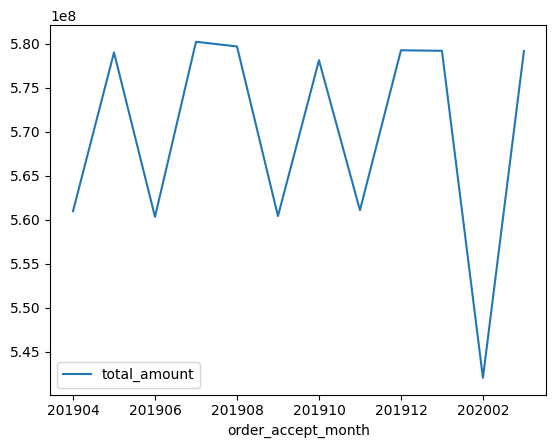

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
month_data.sum().plot()

<Axes: xlabel='order_accept_month'>

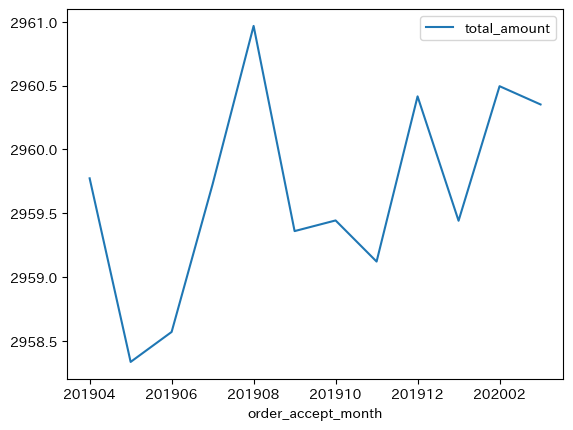

In [ ]:
month_data.mean().plot()

##Let's make a histogram from sales

(array([ 86445.,      0., 197703., 545572., 447393., 312388., 217700.,
        240336., 138070., 125257.]),
 array([ 698. , 1138.2, 1578.4, 2018.6, 2458.8, 2899. , 3339.2, 3779.4,
        4219.6, 4659.8, 5100. ]),
 <BarContainer object of 10 artists>)

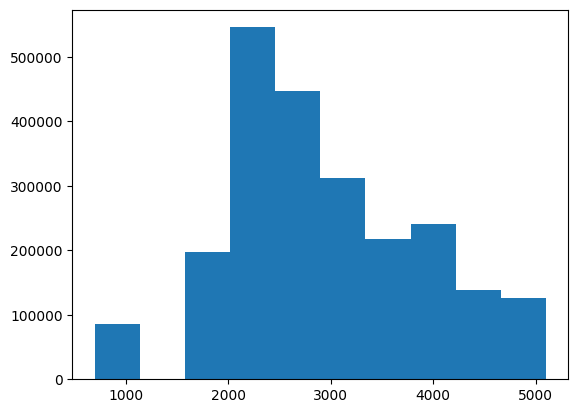

In [ ]:
plt.hist(analyze_data['total_amount'])

(array([ 43127.,  43318.,      0.,      0.,      0., 197703., 184231.,
        314821.,  93424., 267176., 178734., 156018., 110949., 170842.,
         50340., 141862.,  95286.,  44787.,  92989.,  91219.,  34038.]),
 array([ 698.        ,  907.61904762, 1117.23809524, 1326.85714286,
        1536.47619048, 1746.0952381 , 1955.71428571, 2165.33333333,
        2374.95238095, 2584.57142857, 2794.19047619, 3003.80952381,
        3213.42857143, 3423.04761905, 3632.66666667, 3842.28571429,
        4051.9047619 , 4261.52380952, 4471.14285714, 4680.76190476,
        4890.38095238, 5100.        ]),
 <BarContainer object of 21 artists>)

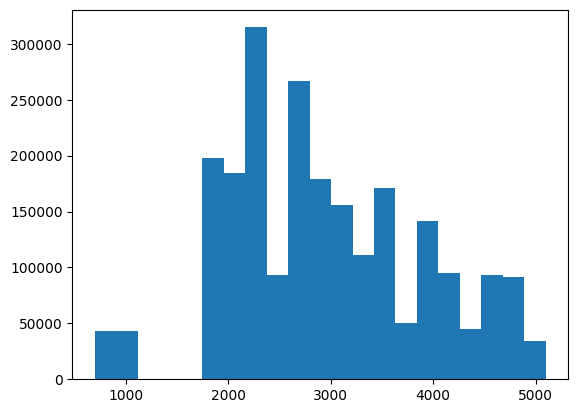

In [ ]:
plt.hist(analyze_data['total_amount'], bins=21)

##Let's Aggregate and Visualize Sales by Prefecture

In [ ]:
pre_data = pd.pivot_table(analyze_data, index='order_accept_month', columns='narrow_area', values='total_amount', aggfunc='mean')
pre_data

narrow_area,千葉,埼玉,東京,栃木,神奈川,群馬,茨城
order_accept_month,,,,,,,
201904,2959.873033,2974.238099,2961.303865,2996.266472,2947.092811,2948.012279,2952.522002
201905,2950.008975,2975.480779,2962.069780,2992.284257,2947.512580,2932.520785,2941.298381
201906,2956.280441,2974.373453,2960.108591,2993.433754,2947.390260,2939.026432,2951.280427
201907,2952.599400,2983.305283,2961.675603,2997.676386,2947.219405,2937.246781,2940.745202
201908,2958.617035,2977.917667,2963.409940,3002.596809,2948.826617,2937.843127,2942.191752
201909,2952.001084,2980.743363,2960.683132,2996.740707,2948.576386,2940.584001,2943.715500
201910,2958.095394,2979.341316,2960.085929,2993.506324,2949.094110,2938.384730,2940.014530
201911,2953.908222,2978.451132,2961.304156,3002.016067,2946.194422,2946.813827,2938.876755
201912,2959.583782,2979.851803,2961.602239,2992.418099,2949.593680,2942.274833,2935.416640


In [ ]:
pip install japanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 45.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120274 sha256=2dcf79d933c8f85ea741f78666ddbeeff456c87f404703a567df78699303b3b9
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


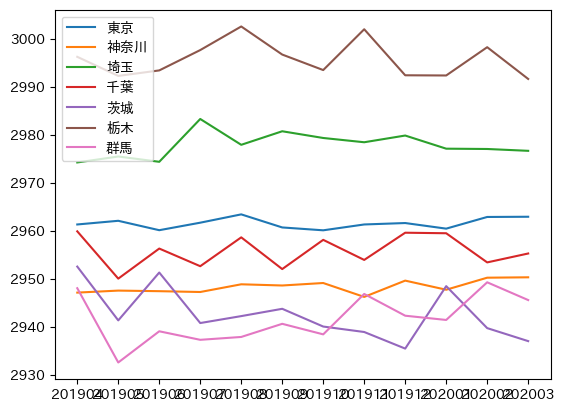

In [ ]:
import japanize_matplotlib
plt.plot(list(pre_data.index), pre_data['東京'], label='東京')
plt.plot(list(pre_data.index), pre_data['神奈川'], label='神奈川')
plt.plot(list(pre_data.index), pre_data['埼玉'], label='埼玉')
plt.plot(list(pre_data.index), pre_data['千葉'], label='千葉')
plt.plot(list(pre_data.index), pre_data['茨城'], label='茨城')
plt.plot(list(pre_data.index), pre_data['栃木'], label='栃木')
plt.plot(list(pre_data.index), pre_data['群馬'], label='群馬')
plt.legend()

##Let's Process Data for Clustering

In [ ]:
store_clustering = analyze_data.groupby('store_id').agg(['size','mean','median', 'max', 'min'])['total_amount']
store_clustering.reset_index(inplace = True, drop = True)
print(len(store_clustering))
store_clustering.head()

196


,size,mean,median,max,min
0,11596,3120.776302,2987.0,5100,1857
1,9374,2991.852251,2732.0,5100,698
2,15134,2946.858597,2808.0,5100,698
3,7005,3060.642256,2877.0,4744,1899
4,11113,2841.018717,2791.0,4744,698


In [ ]:
print(store_clustering.head())

    size         mean  median   max   min
0  11596  3120.776302  2987.0  5100  1857
1   9374  2991.852251  2732.0  5100   698
2  15134  2946.858597  2808.0  5100   698
3   7005  3060.642256  2877.0  4744  1899
4  11113  2841.018717  2791.0  4744   698


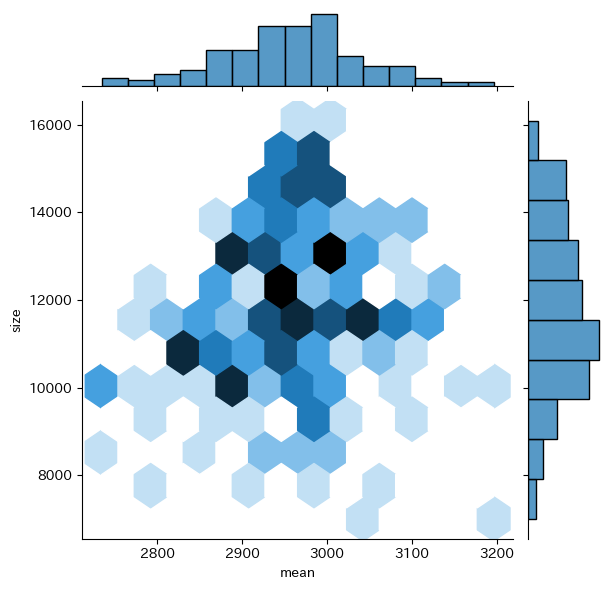

In [ ]:
import seaborn as sns
hexbin = sns.jointplot(x='mean', y='size', data=store_clustering, kind='hex')

##Let's Group Stores by Clustering


In [ ]:
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
store_clustering_sc = sc.fit_transform(store_clustering)

kmeans = KMeans(n_clusters = 4, random_state=0)
clusters = kmeans.fit(store_clustering_sc)
store_clustering['cluster'] = clusters.labels_
print(store_clustering['cluster'].unique())
store_clustering.head()

[3 0 2 1]


,size,mean,median,max,min,cluster
0,11596,3120.776302,2987.0,5100,1857,3
1,9374,2991.852251,2732.0,5100,698,0
2,15134,2946.858597,2808.0,5100,698,0
3,7005,3060.642256,2877.0,4744,1899,3
4,11113,2841.018717,2791.0,4744,698,2


##Let's analyze group trends

In [ ]:
store_clustering.columns = ['月内件数', '月内平均値', '月内中央値', '月内最大値', '月内最小値', 'cluster']
store_clustering.groupby('cluster').count()

,月内件数,月内平均値,月内中央値,月内最大値,月内最小値
cluster,,,,,
0,90,90,90,90,90
1,26,26,26,26,26
2,66,66,66,66,66
3,14,14,14,14,14


In [ ]:
store_clustering.groupby('cluster').mean()

,月内件数,月内平均値,月内中央値,月内最大値,月内最小値
cluster,,,,,
0,13092.600000,2966.694720,2793.600000,5080.222222,740.844444
1,11350.269231,3060.299501,3003.692308,5015.846154,753.615385
2,10538.560606,2881.626668,2721.318182,4746.075758,745.469697
3,10134.142857,3070.624992,2875.357143,4896.571429,1882.071429


##Let's visualize the result of clustering with t-SNE

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
x = tsne.fit_transform(store_clustering_sc)
tsne_df = pd.DataFrame(x)
tsne_df['cluster'] = store_clustering['cluster']
tsne_df.columns = ['axis_0', 'axis_1', 'cluster']
tsne_df.head()

,axis_0,axis_1,cluster
0,-8.273746,-0.587463,3
1,7.336311,3.951308,0
2,2.455599,14.572828,0
3,-9.739388,-2.977783,3
4,-4.995275,-15.994203,2


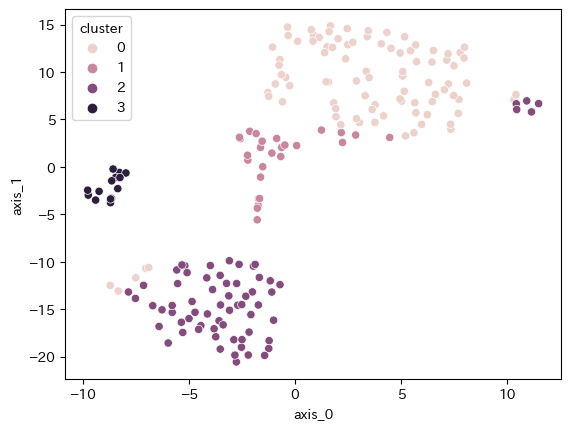

In [ ]:
tsne_graph = sns.scatterplot(x='axis_0', y='axis_1', hue='cluster', data=tsne_df)

#Build a visualization mechanism

##Let's try to narrow down stores and visualize them

In [ ]:
import pandas as pd
from IPython.display import display, clear_output

In [ ]:
from ipywidgets import Dropdown

def order_by_store(val):
    clear_output()
    display(dropdown)    
    pick_data = order_data.loc[(order_data['store_name']==val['new']) & (order_data['status'].isin([1, 2]))]
    display(pick_data.head())

store_list = m_store['store_name'].tolist()

dropdown = Dropdown(options=store_list)
dropdown.observe(order_by_store, names='value')
display(dropdown)

Dropdown(options=('昭島店', 'あきる野店', '足立店', '北千住店', '綾瀬店', '荒川店', '東尾久店', '板橋店', '高島平店', '稲城店', '江戸川店', '西葛西店', '…

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import japanize_matplotlib

def graph_by_store(val):
    clear_output()
    display(dropdown2)
    pick_data = order_data.loc[(order_data['store_name']==val['new']) & (order_data['status'].isin([1, 2]))]
    temp = pick_data[['order_accept_date', 'total_amount']].copy()  
    temp.loc[:,'order_accept_date'] = pd.to_datetime(temp['order_accept_date'])
    temp.set_index('order_accept_date', inplace=True)
    temp.resample('D').sum().plot()
    
dropdown2 = Dropdown(options=store_list)
dropdown2.observe(graph_by_store, names='value')
display(dropdown2)

Dropdown(options=('昭島店', 'あきる野店', '足立店', '北千住店', '綾瀬店', '荒川店', '東尾久店', '板橋店', '高島平店', '稲城店', '江戸川店', '西葛西店', '…

##Let's try to visualize details of multiple stores

In [ ]:
from ipywidgets import SelectMultiple

def order_by_multi(val):
    clear_output()
    display(select)
    pick_data = order_data.loc[(order_data['store_name'].isin(val['new']))  & (order_data['status'].isin([1, 2]))]
    display(pick_data.head())

select = SelectMultiple(options=store_list)
select.observe(order_by_multi, names='value')
display(select)

SelectMultiple(options=('昭島店', 'あきる野店', '足立店', '北千住店', '綾瀬店', '荒川店', '東尾久店', '板橋店', '高島平店', '稲城店', '江戸川店', '西葛…

In [ ]:
def graph_by_multi(val):
    clear_output()
    display(select2)
    
    fig = plt.figure(figsize=(17,4))
    plt.subplots_adjust(wspace=0.25, hspace=0.6)
    
    i = 0
    
    for trg in val['new']:
        pick_data = order_data[(order_data['store_name']==trg) & (order_data['status'].isin([1, 2]))]
        temp = pick_data[['order_accept_date', 'total_amount', 'store_name']].copy()
        temp.loc[:,'order_accept_date'] = pd.to_datetime(temp['order_accept_date'])
        temp.set_index('order_accept_date', inplace=True)
        i += 1
        ax = fig.add_subplot(1, len(val['new']), i)
        ax.plot(temp.resample('D').sum())
        ax.set_title(trg)
        
    
select2 = SelectMultiple(options=store_list)
select2.observe(graph_by_multi, names='value')
display(select2)

SelectMultiple(options=('昭島店', 'あきる野店', '足立店', '北千住店', '綾瀬店', '荒川店', '東尾久店', '板橋店', '高島平店', '稲城店', '江戸川店', '西葛…

In [ ]:
from ipywidgets import IntSlider

def store_lower(val):
    clear_output()
    display(slider)
    temp = order_data.groupby('store_name')
    print(temp.size()[temp.size() < val['new']])

slider = IntSlider(value=1100, min=1000, max=2000, step=100, description='件数:',)
slider.observe(store_lower, names='value')
display(slider)

IntSlider(value=1100, description='件数:', max=2000, min=1000, step=100)

In [ ]:
def store_upper(val):
    clear_output()
    display(slider2)
    temp = order_data.groupby('store_name')
    print(temp.size()[temp.size() > val['new']])

slider2 = IntSlider(value=1600, min=1000, max=2000, step=100, description='件数:',)
slider2.observe(store_upper, names='value')
display(slider2)

IntSlider(value=1600, description='件数:', max=2000, min=1000, step=100)

##Let's Extract Regional Data with Toggle Button

In [ ]:
from ipywidgets import ToggleButtons

area_list = m_area['wide_area'].unique()

def order_by_area(val):
    clear_output()
    display(toggle)
    pick_data = order_data.loc[(order_data['wide_area'] == val['new']) & (order_data['status'].isin([1, 2]))]
    display(pick_data.head())

toggle = ToggleButtons(options=area_list)
toggle.observe(order_by_area, names='value')
display(toggle)

ToggleButtons(options=('東京', '神奈川', '千葉', '埼玉', '北関東'), value='東京')

In [ ]:
def graph_by_area(val):
    clear_output()
    display(toggle2)
    pick_data = order_data.loc[(order_data['wide_area']==val['new']) & (order_data['status'].isin([1, 2]))]
    temp = pick_data[['order_accept_date', 'total_amount']].copy()  
    temp.loc[:,'order_accept_date'] = pd.to_datetime(temp['order_accept_date'])
    temp.set_index('order_accept_date', inplace=True)
    temp.resample('D').sum().plot()

toggle2 = ToggleButtons(options=area_list)
toggle2.observe(graph_by_area, names='value')
display(toggle2)

ToggleButtons(options=('東京', '神奈川', '千葉', '埼玉', '北関東'), value='東京')

##Let's Extract Data by Specifying a Date

In [ ]:
from ipywidgets import DatePicker
import datetime

order_data.loc[:,'order_date'] = pd.to_datetime(order_data['order_accept_date']).dt.date

def order_by_date(val):
    clear_output()
    display(date_picker)
    pick_data = order_data.loc[(order_data['order_date'] == val['new']) & (order_data['status'].isin([1, 2]))]
    print(len(pick_data))
    display(pick_data.head())

date_picker = DatePicker(value=datetime.datetime(2020, 4, 1))
date_picker.observe(order_by_date, names='value')
display(date_picker)

DatePicker(value=datetime.datetime(2020, 4, 1, 0, 0))

In [ ]:
min_date = datetime.date(2020, 4, 1)
max_date = datetime.date(2020, 4, 30)

###When a period of time is set, the function is called, and the period data is extracted and displayed on the screen.

In [ ]:
## 期間が設定されたら呼ばれれる関数、期間データを抽出し画面に表示
def order_between_date():
    clear_output()
    display(date_picker_min)
    display(date_picker_max)
    pick_data = order_data.loc[(order_data['order_date'] >= min_date) & (order_data['order_date'] <= max_date) & (order_data['status'].isin([1, 2]))]
    print(len(pick_data))
    display(pick_data.head())

###Function to set a variable to the date of the minimum day (the period itself)

In [ ]:
# 最小日（期間自）の日付を変数にセットする関数
def set_min_date(val):
    global min_date
    min_date = val['new']
    order_between_date()

### Function to set a variable to the date of the maximum day (the end of the period)

In [ ]:
# 最大日（期間至）の日付を変数にセットする関数
def set_max_date(val):
    global max_date
    max_date = val['new']
    order_between_date()

In [ ]:
date_picker_min = DatePicker(value=min_date)
date_picker_min.observe(set_min_date, names='value')
print("最小日付")
display(date_picker_min)
date_picker_max = DatePicker(value=max_date)
date_picker_max.observe(set_max_date, names='value')
print("最大日付")
display(date_picker_max)

最小日付


DatePicker(value=datetime.date(2020, 4, 1))

最大日付


DatePicker(value=datetime.date(2020, 4, 30))

##Let's build data with a story in mind!

In [ ]:
import glob
import os
current_dir = os.getcwd()
tbl_order_file = os.path.join(current_dir, 'tbl_order_*.csv')
tbl_order_files = glob.glob(tbl_order_file)

order_all = pd.DataFrame()
for file in tbl_order_files:
    order_tmp = pd.read_csv(file)
    print(f'{file}:{len(order_tmp)}')
    order_all = pd.concat([order_all, order_tmp], ignore_index=True)

/content/tbl_order_202003.csv:241087
/content/tbl_order_201907.csv:240976
/content/tbl_order_201911.csv:233191
/content/tbl_order_201904.csv:233393
/content/tbl_order_202002.csv:225564
/content/tbl_order_201910.csv:241060
/content/tbl_order_201912.csv:241052
/content/tbl_order_202001.csv:241049
/content/tbl_order_201906.csv:233295
/content/tbl_order_201909.csv:233215
/content/tbl_order_201908.csv:241122
/content/tbl_order_201905.csv:241041


In [ ]:
# 保守用店舗データの削除
order_all = order_all.loc[order_all['store_id'] != 999]

In [ ]:
summary_df = order_all.loc[order_all['status'].isin([1, 2])]
store_summary_df = summary_df.groupby(['store_id'])['total_amount'].sum()
store_summary_df = pd.merge(store_summary_df, m_store, on='store_id', how='left')
print("売上上位")
display(store_summary_df.sort_values('total_amount', ascending=False).head(10))
print("売上下位")
display(store_summary_df.sort_values('total_amount', ascending=True).head(10))

売上上位


,store_id,total_amount,store_name,area_cd
47,48,48273811,上野店,TK
190,191,47299855,伊勢崎店,GU
67,68,45510957,八王子店,TK
43,44,45212070,世田谷店,TK
122,123,45083722,栄店,KN
62,63,45039200,西多摩店,TK
126,127,44996182,戸塚店,KN
172,173,44945687,戸田店,SA
99,100,44597758,中原店,KN
188,189,44567553,佐野店,TO


売上下位


,store_id,total_amount,store_name,area_cd
100,101,21439799,宮前店,KN
151,152,22710409,四街道店,CH
2,3,22910850,足立店,TK
75,76,23152307,本郷店,TK
11,12,23483552,西葛西店,TK
195,196,23791237,前橋店,GU
185,186,24339372,足利店,TO
69,70,24874926,東久留米店,TK
161,162,24876479,越谷店,SA
145,146,25142683,成田店,CH


In [ ]:
cancel_df = pd.DataFrame()
cancel_cnt = order_all.loc[order_all['status']==9].groupby(['store_id'])['store_id'].count()
order_cnt = order_all.loc[order_all['status'].isin([1, 2, 9])].groupby(['store_id'])['store_id'].count()
cancel_rate = (cancel_cnt / order_cnt) * 100
cancel_df["cancel_rate"] = cancel_rate
cancel_df = pd.merge(cancel_df, m_store, on='store_id', how='left')
print("キャンセル率が低い")
display(cancel_df.sort_values('cancel_rate', ascending=True).head(10))
print("キャンセル率が高い")
display(cancel_df.sort_values('cancel_rate', ascending=False).head(10))

キャンセル率が低い


,store_id,cancel_rate,store_name,area_cd
117,118,17.475292,磯子店,KN
92,93,17.509764,小田原店,KN
109,110,17.519081,藤沢店,KN
121,122,17.531775,港北店,KN
42,43,17.551963,向島店,TK
24,25,17.582489,南砂店,TK
137,138,17.678737,佐倉店,CH
40,41,17.698272,荻窪店,TK
146,147,17.779961,富津店,CH
19,20,17.791636,王子店,TK


キャンセル率が高い


,store_id,cancel_rate,store_name,area_cd
5,6,19.333581,荒川店,TK
2,3,19.277457,足立店,TK
194,195,19.259684,館林店,GU
17,18,19.071138,亀有店,TK
75,76,19.061977,本郷店,TK
23,24,19.056093,富岡店,TK
161,162,19.009109,越谷店,SA
156,157,18.998020,川越店,SA
112,113,18.986558,大和店,KN
99,100,18.956838,中原店,KN


##Let's Analyze Reasons for Cancellation

In [ ]:
def calc_delta(t):
    t1, t2 = t
    delta = t2 - t1
    return delta.total_seconds()/60

order_all.loc[:,'order_accept_datetime'] = pd.to_datetime(order_all['order_accept_date'])
order_all.loc[:,'delivered_datetime'] = pd.to_datetime(order_all['delivered_date'])
order_all.loc[:,'delta'] = order_all[['order_accept_datetime', 'delivered_datetime']].apply(calc_delta, axis=1)

delivery_df = order_all.loc[(order_all['status']==2) & (order_all['store_id'].isin([8, 122]))]
delivery_df.groupby(['store_id'])['delta'].mean()

store_id
8      48.112328
122    20.324085
Name: delta, dtype: float64

##Let's test a hypothesis

In [ ]:
temp_cancel = cancel_df.copy()
temp_delivery = order_all.loc[order_all['status']==2].groupby([('store_id')])['delta'].mean()
check_df = pd.merge(temp_cancel, temp_delivery, on='store_id', how='left')
check_df.head()

,store_id,cancel_rate,store_name,area_cd,delta
0,1,18.903420,昭島店,TK,34.411150
1,2,18.170122,あきる野店,TK,34.568835
2,3,19.277457,足立店,TK,34.448714
3,4,18.844510,北千住店,TK,34.706122
4,5,18.436236,綾瀬店,TK,34.575449


In [ ]:
# 全体
temp_chk = check_df[['cancel_rate', 'delta']]
display(temp_chk.corr())

,cancel_rate,delta
cancel_rate,1.000000,0.344533
delta,0.344533,1.000000


In [ ]:
# キャンセル率が高い（第3四分位以上）店舗のみ
th_high = check_df['cancel_rate'].quantile(0.75)
temp_chk = check_df.loc[(check_df['cancel_rate'] >= th_high)]
temp_chk = temp_chk[['cancel_rate', 'delta']]
display(temp_chk.corr())

,cancel_rate,delta
cancel_rate,1.000000,0.123353
delta,0.123353,1.000000


In [ ]:
# キャンセル率が低い（第1四分位以下）店舗のみ
th_low = check_df['cancel_rate'].quantile(0.25)
temp_chk = check_df.loc[(check_df['cancel_rate'] >= th_low)]
temp_chk = temp_chk[['cancel_rate', 'delta']]
display(temp_chk.corr())

,cancel_rate,delta
cancel_rate,1.000000,0.299941
delta,0.299941,1.000000


##Let's build a dashboard by combining parts and data based on a story

In [ ]:
import seaborn as sns

# 環境変数
target_store = ""
min_date = datetime.date(2020, 4, 1)
max_date = datetime.date(2020, 4, 30)

In [ ]:
def make_board():
    clear_output()
    display(toggle_db)
    
    # データ作成処理
    pick_order_data = order_all.loc[(order_all['store_name']==target_store) & (order_all['order_date'] >= min_date) & (order_all['order_date'] <= max_date) & (order_all['status'].isin([1, 2]))]
    pick_cancel_data = order_all.loc[(order_all['store_name']==target_store) & (order_all['order_date'] >= min_date) & (order_all['order_date'] <= max_date) & (order_all['status']==9)]
    pick_order_all = order_all.loc[(order_all['order_date'] >= min_date) & (order_all['order_date'] <= max_date) & (order_all['status'].isin([1, 2]))]
    pick_cancel_all = order_all.loc[(order_all['order_date'] >= min_date) & (order_all['order_date'] <= max_date) & (order_all['status']==9)]
    store_o_cnt = len(pick_order_data)
    store_c_cnt = len(pick_order_data['customer_id'].unique())
    store_cancel_rate = (len(pick_cancel_data)/(len(pick_order_data)+len(pick_cancel_data))) * 100
    delivery_time = pick_order_data.loc[pick_order_data['status'] == 2]['delta'].mean()
    delivery_time_all = pick_order_all.loc[pick_order_all['status'] == 2]['delta'].mean()
    
    # 画面の描画処理
    temp = pick_order_data[['order_date', 'total_amount']].copy()
    temp.loc[:,'order_date'] = pd.to_datetime(temp['order_date'])
    temp.set_index('order_date', inplace=True)
    
    print("========================================================================================================")
    str_out = f"■■{target_store}■■ 【対象期間】：{min_date}～{max_date} "
    str_out = str_out + f"【オーダー件数】：{store_o_cnt} 件  【利用顧客数】: {store_c_cnt}"
    print(str_out)
    print("--------------------------------------------------------------------------------------------------------")
    print(f"■■■■■■ 日毎の売上 ■■■■■■■■")
    display(temp.resample('D').sum())
    print("--------------------------------------------------------------------------------------------------------")
    str_out = f"【期間売上総額】：{'{:,}'.format(temp['total_amount'].sum())} "
    str_out = str_out + f"【キャンセル総額】：{'{:,}'.format(pick_cancel_data['total_amount'].sum())} "
    str_out = str_out + f"【キャンセル率】:{round(store_cancel_rate, 2)} % "
    print(str_out)
    str_out = f"【平均配達完了時間】：{round(delivery_time, 2)}分"
    str_out = str_out + f"【全店舗平均配達時間】：{round(delivery_time_all, 2)}分"
    print(str_out)
    print("--------------------------------------------------------------------------------------------------------")
    
    # グラフ作成処理
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
    sns.histplot(temp.resample('D').sum(), ax=ax1, kde=False)
    ax1.set_title("売上（日単位）ヒストグラム")
    
    sns.countplot(x='order_date', data=pick_cancel_data, ax=ax2)
    ax2.set_title("キャンセル数（日単位）")
        
    fig, (ax3) = plt.subplots(1, 1, figsize=(20 ,5))
    sns.boxplot(x="order_date", y="total_amount", data=pick_order_data)
    ax3.set_title("オーダー状況箱ひげ図")
          
    plt.show()


In [ ]:
# カレンダー変更時の処理
def change_date_min(val):
    global min_date
    min_data = val['new']
    make_board()

def change_date_max(val):
    global max_date
    max_date = val['new']
    make_board()

In [ ]:
# ドロップダウン変更時の処理
def change_dropdown(val):
    global target_store
    target_store = val['new']
    
    # 期間指定機能
    date_picker_min = DatePicker(value=min_date)
    date_picker_min.observe(change_date_min, names='value')
    print("期間")
    date_picker_max = DatePicker(value=max_date)
    date_picker_max.observe(change_date_max, names='value')
    display(date_picker_min, date_picker_max)

In [ ]:
# 地域トグルボタン処理
def order_by_area(val):
    clear_output()
    display(toggle_db)
    # 選択された地域の店舗リストを作成する
    store_list = order_all.loc[order_all['wide_area']==val['new']]['store_name'].unique()
    # 作成された店舗リストでドロップダウンを作成する
    dropdown = Dropdown(options=store_list)
    dropdown.observe(change_dropdown, names='value')
    display(dropdown)

In [ ]:
# 保守用店舗データの削除
order_all = order_all.loc[order_all['store_id'] != 999]

order_all = pd.merge(order_all, m_store, on='store_id', how='left')
order_all = pd.merge(order_all, m_area, on='area_cd', how='left')

# マスターにないコードに対応した文字列を設定
order_all.loc[order_all['takeout_flag'] == 0, 'takeout_name'] = 'デリバリー'
order_all.loc[order_all['takeout_flag'] == 1, 'takeout_name'] = 'お持ち帰り'

order_all.loc[order_all['status'] == 0, 'status_name'] = '受付'
order_all.loc[order_all['status'] == 1, 'status_name'] = 'お支払済'
order_all.loc[order_all['status'] == 2, 'status_name'] = 'お渡し済'
order_all.loc[order_all['status'] == 9, 'status_name'] = 'キャンセル'

order_all.loc[:,'order_date'] = pd.to_datetime(order_all['order_accept_date']).dt.date

order_all.head()

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,order_accept_datetime,delivered_datetime,delta,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name,order_date
0,98632919,149,C32180552,60,58306418,2020-03-01 11:00:00,2020-03-01 11:36:00,1,2677,9,2020-03-01 11:00:00,2020-03-01 11:36:00,36.0,松戸店,CH,千葉,千葉,お持ち帰り,キャンセル,2020-03-01
1,58365678,30,C24307399,52,6981016,2020-03-01 11:00:00,2020-03-01 11:47:00,0,3234,2,2020-03-01 11:00:00,2020-03-01 11:47:00,47.0,品川店,TK,東京,東京,デリバリー,お渡し済,2020-03-01
2,24932966,23,C65561395,12,85886484,2020-03-01 11:00:00,2020-03-01 11:16:00,0,2987,2,2020-03-01 11:00:00,2020-03-01 11:16:00,16.0,江東店,TK,東京,東京,デリバリー,お渡し済,2020-03-01
3,49670812,75,C31890729,4,4672064,2020-03-01 11:00:00,2020-03-01 11:37:00,0,3617,2,2020-03-01 11:00:00,2020-03-01 11:37:00,37.0,福生店,TK,東京,東京,デリバリー,お渡し済,2020-03-01
4,98992853,93,C72777249,53,86705367,2020-03-01 11:00:00,2020-03-01 11:20:00,0,1882,9,2020-03-01 11:00:00,2020-03-01 11:20:00,20.0,小田原店,KN,神奈川,神奈川,デリバリー,キャンセル,2020-03-01


In [ ]:
# トグルボタンを表示
toggle_db = ToggleButtons(options=area_list)
toggle_db.observe(order_by_area, names='value')
display(toggle_db)

ToggleButtons(index=2, options=('東京', '神奈川', '千葉', '埼玉', '北関東'), value='千葉')

Dropdown(options=('松戸店', '君津店', '佐倉店', '柏店', '習志野店', '富里店', '富津店', '茂原店', '白井店', '木更津店', '若葉店', '千葉緑店', '成田店',…

In [ ]:
cal_orders_base = order_all.loc[(order_all['status'].isin([1, 2]))]
print(cal_orders_base.head())


   order_id  store_id customer_id  coupon_cd  sales_detail_id  \
1  58365678        30   C24307399         52          6981016   
2  24932966        23   C65561395         12         85886484   
3  49670812        75   C31890729          4          4672064   
5   8016158       162   C81872458         21         34258504   
7  82992322       194   C05026346         40         53901641   

     order_accept_date       delivered_date  takeout_flag  total_amount  \
1  2020-03-01 11:00:00  2020-03-01 11:47:00             0          3234   
2  2020-03-01 11:00:00  2020-03-01 11:16:00             0          2987   
3  2020-03-01 11:00:00  2020-03-01 11:37:00             0          3617   
5  2020-03-01 11:00:00  2020-03-01 11:50:00             0          3050   
7  2020-03-01 11:01:01  2020-03-01 11:18:01             0          2122   

   status order_accept_datetime  delivered_datetime  delta  
1       2   2020-03-01 11:00:00 2020-03-01 11:47:00   47.0  
2       2   2020-03-01 11:00:00 2020

In [ ]:
cal_orders_base = order_all.loc[(order_all['status'].isin([1, 2]))]
    
# 地域のランキング（配達時間）
print("配達時間　＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝")
print("地域ランキング ---------------")
display(pd.DataFrame(cal_orders_base.groupby(['narrow_area'])['delta'].mean().sort_values()))
print("地域毎のTOP5 ---------------")
for area in m_area['area_cd']:
    temp = cal_orders_base.loc[cal_orders_base['area_cd']==area]
    temp = temp.groupby(['store_id'])['delta'].mean().sort_values()
    temp = pd.merge(temp, m_store, on='store_id')[['store_name', 'delta']]
    display(temp.head())

配達時間　＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
地域ランキング ---------------


,delta
narrow_area,
茨城,32.228448
神奈川,33.720303
東京,34.492187
群馬,34.499155
栃木,34.504248
埼玉,34.758227
千葉,35.037272


地域毎のTOP5 ---------------


,store_name,delta
0,荻窪店,20.253223
1,羽村店,20.296335
2,恵比寿店,20.360902
3,王子店,20.556359
4,大田店,34.284466


,store_name,delta
0,金沢店,20.156883
1,栄店,20.306659
2,港北店,20.316794
3,泉店,34.138095
4,南足柄店,34.167137


,store_name,delta
0,我孫子店,20.249334
1,松戸店,34.307231
2,富津店,34.308244
3,茂原店,34.351502
4,流山店,34.367189


,store_name,delta
0,上尾店,20.205887
1,八潮店,34.291705
2,入間店,34.308461
3,さいたま西店,34.316210
4,さいたま緑店,34.363389


,store_name,delta
0,那珂店,20.253853
1,取手店,34.439236
2,守谷店,34.450204
3,日立店,34.452558
4,水戸店,34.580012


,store_name,delta
0,栃木店,34.385837
1,足利店,34.428210
2,佐野店,34.454977
3,宇都宮店,34.573652
4,小山店,34.689728


,store_name,delta
0,前橋店,34.364315
1,桐生店,34.417995
2,館林店,34.528509
3,高崎店,34.528935
4,伊勢崎店,34.535870


In [ ]:
# 地域のランキング（キャンセル率）
base_df = pd.merge(check_df, m_store, on='area_cd')
base_df = pd.merge(base_df, m_area, on='area_cd')
print("キャンセル率　＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝")
print("地域ランキング ---------------")
display(pd.DataFrame(base_df.groupby(['narrow_area'])['cancel_rate'].mean().sort_values()))
print("地域毎のTOP5 ---------------")
for area in m_area['area_cd']:
    temp = check_df.loc[check_df['area_cd']==area]
    temp = temp.groupby(['store_id'])['cancel_rate'].mean().sort_values()
    temp = pd.merge(temp, m_store, on='store_id')[['store_name', 'cancel_rate']]
    display(temp.head())

キャンセル率　＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
地域ランキング ---------------


,cancel_rate
narrow_area,
茨城,18.183298
神奈川,18.261708
栃木,18.294188
千葉,18.348461
埼玉,18.405744
東京,18.408234
群馬,18.540054


地域毎のTOP5 ---------------


,store_name,cancel_rate
0,向島店,17.551963
1,南砂店,17.582489
2,荻窪店,17.698272
3,王子店,17.791636
4,駒沢店,17.834343


,store_name,cancel_rate
0,磯子店,17.475292
1,小田原店,17.509764
2,藤沢店,17.519081
3,港北店,17.531775
4,鶴見店,17.804783


,store_name,cancel_rate
0,佐倉店,17.678737
1,富津店,17.779961
2,茂原店,17.961105
3,我孫子店,17.992167
4,柏店,18.074305


,store_name,cancel_rate
0,東松山店,17.807958
1,上尾店,17.885473
2,久喜店,17.906476
3,大宮店,18.053745
4,川口店,18.064565


,store_name,cancel_rate
0,守谷店,17.937188
1,水戸店,18.169142
2,日立店,18.214795
3,那珂店,18.218539
4,つくば店,18.239075


,store_name,cancel_rate
0,足利店,18.095238
1,佐野店,18.133523
2,小山店,18.258450
3,宇都宮店,18.458324
4,栃木店,18.525403


,store_name,cancel_rate
0,太田店,18.163215
1,伊勢崎店,18.211374
2,高崎店,18.487272
3,前橋店,18.494860
4,桐生店,18.623922


#Build a reporting system

##Let's output the sales data of a specific store to Excel.

In [ ]:
import openpyxl

wb = openpyxl.Workbook()
ws = wb['Sheet']
ws.cell(1,1).value = '書き込みテストです。'
wb.save('test.xlsx')
wb.close()

In [ ]:
wb = openpyxl.load_workbook('test.xlsx', read_only=True)
ws = wb['Sheet']
print(ws.cell(1, 1).value)
wb.close()

書き込みテストです。


In [ ]:
# テストデータの準備
store_id = 1
store_df = order_all.loc[order_all['store_id']==store_id].copy()
store_name = store_df['store_name'].unique()[0]
store_sales_total = store_df.loc[store_df['status'].isin([1, 2])]['total_amount'].sum()
store_sales_takeout = store_df.loc[store_df['status']==1]['total_amount'].sum()
store_sales_delivery = store_df.loc[store_df['status']==2]['total_amount'].sum()
print(f'売上額確認　{store_sales_total} = {store_sales_takeout + store_sales_delivery}')
output_df = store_df[['order_accept_date','customer_id','total_amount','takeout_name','status_name']]
output_df.head()

売上額確認　36188522 = 36188522


,order_accept_date,customer_id,total_amount,takeout_name,status_name
16,2020-03-01 11:01:01,C19514875,5100,お持ち帰り,キャンセル
48,2020-03-01 11:03:03,C02859946,1857,デリバリー,お渡し済
126,2020-03-01 11:11:11,C16688505,3319,お持ち帰り,キャンセル
139,2020-03-01 11:12:12,C27235359,2791,デリバリー,キャンセル
204,2020-03-01 11:18:18,C42767658,2808,お持ち帰り,お支払済


In [ ]:
from openpyxl.utils.dataframe import dataframe_to_rows

store_title = f'{store_id}_{store_name}'

wb = openpyxl.Workbook()
ws = wb.active
ws.title = store_title

ws.cell(1, 1).value = f'{store_title} 売上データ'

# OpenPyXLのユーティリティdataframe_to_rowsを利用
rows = dataframe_to_rows(output_df, index=False, header=True)

# 表の貼り付け位置
row_start = 3
col_start = 2

for row_no, row in enumerate(rows, row_start):
    for col_no, value in enumerate(row, col_start):
        ws.cell(row_no, col_no).value = value

filename = f'{store_title}.xlsx'
wb.save(filename)
wb.close()

##Let's prepare and output an Excel table

In [ ]:
# スタイル関係のインポート
from openpyxl.styles import PatternFill, Border, Side, Font

openpyxl.load_workbook(filename)
ws = wb[store_title]

side = Side(style='thin', color='008080')
border = Border(top=side, bottom=side, left=side, right=side)

# データの表の部分に罫線を設定
for row in ws:
    for cell in row:
        if ws[cell.coordinate].value:
            ws[cell.coordinate].border = border

In [ ]:
ws.cell(1,1).font = Font(bold=True, color='008080')

cell = ws.cell(3, 2)
cell.fill = PatternFill(patternType='solid', fgColor='008080')
cell.value = '注文受注日時'
cell.font = Font(bold=True, color='FFFFFF')

cell = ws.cell(3, 3)
cell.fill = PatternFill(patternType='solid', fgColor='008080')
cell.value = '顧客ID'
cell.font = Font(bold=True, color='FFFFFF')

cell = ws.cell(3, 4)
cell.fill = PatternFill(patternType='solid', fgColor='008080')
cell.value = '購入総額'
cell.font = Font(bold=True, color='FFFFFF')

cell = ws.cell(3, 5)
cell.fill = PatternFill(patternType='solid', fgColor='008080')
cell.value = '注文タイプ'
cell.font = Font(bold=True, color='FFFFFF')

cell = ws.cell(3, 6)
cell.fill = PatternFill(patternType='solid', fgColor='008080')
cell.value = '注文状態'
cell.font = Font(bold=True, color='FFFFFF')

ws.column_dimensions['A'].width = 20
ws.column_dimensions['B'].width = 20
ws.column_dimensions['C'].width = 12
ws.column_dimensions['D'].width = 12
ws.column_dimensions['E'].width = 12
ws.column_dimensions['F'].width = 12

# ファイルに保存
wb.save(filename)
wb.close()

##Let's output data other than sales data

In [ ]:
def calc_delta(t):
    t1, t2 = t
    delta = t2 - t1
    return delta.total_seconds()/60

store_df.loc[:,'order_accept_datetime'] = pd.to_datetime(store_df['order_accept_date'])
store_df.loc[:,'delivered_datetime'] = pd.to_datetime(store_df['delivered_date'])
store_df.loc[:,'delta'] = store_df[['order_accept_datetime', 'delivered_datetime']].apply(calc_delta, axis=1)

delivery_time = store_df.groupby(['store_id'])['delta'].describe()
delivery_time

,count,mean,std,min,25%,50%,75%,max
store_id,,,,,,,,
1,14299.0,34.390587,14.465928,10.0,22.0,34.0,47.0,59.0


In [ ]:
openpyxl.load_workbook(filename)
ws = wb[store_title]

cell = ws.cell(1, 7)
cell.value = f'配達完了までの時間'
cell.font = Font(bold=True, color='008080')

rows = dataframe_to_rows(delivery_time, index=False, header=True)

# 表の貼り付け位置
row_start = 3
col_start = 8

for row_no, row in enumerate(rows, row_start):
    for col_no, value in enumerate(row, col_start):
        cell = ws.cell(row_no, col_no)
        cell.value = value
        cell.border = border
        if row_no == row_start:
            cell.fill = PatternFill(patternType='solid', fgColor='008080')
            cell.font = Font(bold=True, color='FFFFFF')
        
filename = f'{store_title}.xlsx'
wb.save(filename)
wb.close()

##Output problematic parts in red

In [ ]:
openpyxl.load_workbook(filename)
ws = wb[store_title]

rows = dataframe_to_rows(output_df, index=False, header=True)

# 表の貼り付け位置
row_start = 3
col_start = 2


for row_no, row in enumerate(rows, row_start):
    if row_no == row_start:
        continue
    for col_no, value in enumerate(row, col_start):
        ws.cell(row_no, col_no).value = value
        if value == 'キャンセル':
            ws.cell(row_no, col_no).font = Font(bold=True, color='FF0000')

filename = f'{store_title}.xlsx'
wb.save(filename)
wb.close()

##Use Excel cell functions to create daily totals

In [ ]:
openpyxl.load_workbook(filename)
ws = wb[store_title]

cell = ws.cell(7, 7)
cell.value = '集計'
cell.font = Font(bold=True, color='008080')

cell = ws.cell(8,8)
cell.value = 'データ総額'
cell.font = Font(bold=True, color='008080')

cell = ws.cell(8,10)
cell.value = f'=SUM(D4:D{ws.max_row})'

cell = ws.cell(9,8)
cell.value = '　内 決済完了額'
cell.font = Font(bold=True)

cell = ws.cell(9,10)
cell.value = f'=SUMIF(F4:F{ws.max_row},"<>キャンセル",D4:D{ws.max_row})'

cell = ws.cell(10,8)
cell.value = '　内 キャンセル額'
cell.font = Font(bold=True)

cell = ws.cell(10,10)
cell.value = f'=SUMIF(F4:F{ws.max_row},"=キャンセル",D4:D{ws.max_row})'

filename = f'{store_title}.xlsx'
wb.save(filename)
wb.close()

##Let's try outputting data as a line graph

In [ ]:
from openpyxl.chart import Reference, BarChart, PieChart, LineChart, ScatterChart, Series

openpyxl.load_workbook(filename)
ws = wb[store_title]

cell = ws.cell(7, 7)
cell.value = f'売上グラフ'
cell.font = Font(bold=True, color='008080')

# グラフ用の参照データを指定、D列（購入総額）の4行目から20件を指定
refy = Reference(ws, min_col=4, min_row=4, max_col=4, max_row=23)

# グラフシリーズを生成
series = Series(refy, title='売上額')

# Chart
chart = LineChart()
chart.title = '折れ線グラフ'
chart.x_axis.title = '件数'
chart.y_axis.title = '売上額'
chart.height = 10
chart.width = 20
chart.series.append(series)

# 生成したChartオブジェクトをシートの指定位置に追加
ws.add_chart(chart, 'H12')

filename = f'{store_title}.xlsx'
wb.save(filename)
wb.close()

##Let's prepare data for reports

In [ ]:
# キャンセル率ランキングデータを準備
cancel_df = pd.DataFrame()
cancel_cnt = order_all.loc[order_all['status']==9].groupby(['store_id'])['store_id'].count()
order_cnt = order_all.loc[order_all['status'].isin([1, 2, 9])].groupby(['store_id'])['store_id'].count()
cancel_rate = (cancel_cnt / order_cnt) * 100
cancel_df['cancel_rate'] = cancel_rate
cancel_df = pd.merge(cancel_df, m_store, on='store_id', how='left')
cancel_rank = cancel_df.sort_values('cancel_rate', ascending=True).reset_index()

def check_store_cancel_rank(trg_id):
    tmp = cancel_rank.loc[cancel_rank['store_id']==trg_id].index + 1
    return tmp[0]

In [ ]:
def get_area_df(trg_id):
    # 該当店舗が属する、地域別データの集計と売上ランク
    area_df = pd.DataFrame()
    area_df = order_all.loc[order_all['area_cd']==store_df['area_cd'].unique()[0]]
    area_df = area_df.loc[area_df['status'].isin([1, 2])]
    return area_df

def get_area_rank_df(trg_id):
    area_df = get_area_df(trg_id)
    area_rank = area_df.groupby(['store_id'])['total_amount'].sum().sort_values(ascending=False)
    area_rank = pd.merge(area_rank, m_store, on='store_id', how='left')
    
    return area_rank

def check_store_sales_rank(trg_id):
    area_rank = get_area_rank_df(trg_id)
    
    tmp = area_rank.loc[area_rank['store_id']==trg_id].index + 1
    return tmp[0]

In [ ]:
def make_store_daily(trg_id):
    # 該当店舗の日毎売上データ
    tmp_store_df = order_all.loc[(order_all['store_id']==trg_id) & (order_all['status'].isin([1, 2]))]
    tmp = tmp_store_df[['order_accept_date', 'total_amount']].copy()  
    tmp.loc[:,'order_accept_date'] = pd.to_datetime(tmp['order_accept_date'])
    tmp.set_index('order_accept_date', inplace=True)
    tmp = tmp.resample('D').sum().reset_index()
    
    return tmp

In [ ]:
def get_area_delivery(trg_id):
    # 該当店舗が属する、地域別データの配達完了までの時間ランク
    area_delivery = pd.DataFrame()
    area_df = get_area_df(trg_id)
    area_delivery = area_df.loc[area_df['status']==2].copy()

    area_delivery.loc[:,'order_accept_datetime'] = pd.to_datetime(area_delivery['order_accept_date'])
    area_delivery.loc[:,'delivered_datetime'] = pd.to_datetime(area_delivery['delivered_date'])
    area_delivery.loc[:,'delta'] = area_delivery[['order_accept_datetime', 'delivered_datetime']].apply(calc_delta, axis=1)

    return area_delivery

def get_area_delivery_rank_df(trg_id):
    area_delivery = get_area_delivery(trg_id)
    area_delivery_rank = area_delivery.groupby(['store_id'])['delta'].mean().sort_values()
    area_delivery_rank = pd.merge(area_delivery_rank, m_store, on='store_id', how='left')
    
    return area_delivery_rank
    
def check_store_delivery_rank(trg_id):
    area_delivery_rank = get_area_delivery_rank_df(trg_id)
    
    tmp = area_delivery_rank.loc[area_delivery_rank['store_id']==trg_id].index + 1
    return tmp[0]

##Let's output necessary data to a data sheet

In [ ]:
# 最初にテスト用のファイルを削除
if os.path.exists('test.xlsx') : os.remove('test.xlsx')
if os.path.exists(filename): os.remove(filename)

In [ ]:
def data_sheet_output(trg_wb, sheetname, target_df, indexFlg):
    ws = trg_wb.create_sheet(title=sheetname)

    rows = dataframe_to_rows(target_df, index=indexFlg, header=True)

    # 表の貼り付け位置
    row_start = 1
    col_start = 1

    for row_no, row in enumerate(rows, row_start):
        for col_no, value in enumerate(row, col_start):
            ws.cell(row_no, col_no).value = value

    # データシートは非表示にしておく
    ws.sheet_state = 'hidden'

In [ ]:
def make_data_sheet(trg_id, trg_st_df, targetfolder):
    target_daily = make_store_daily(trg_id)    
    store_name = trg_st_df['store_name'].unique()[0]
    
    # 新たにファイルを作成する
    store_title = f'{trg_id}_{store_name}'

    wb = openpyxl.Workbook()
    
    # キャンセルランキング
    data_sheet_output(wb, 'Data_CancelRank', cancel_rank, False)
    # エリア売上ランキング
    data_sheet_output(wb, 'Data_AreaRank', get_area_rank_df(trg_id), False)
    # エリア配達時間ランキング
    data_sheet_output(wb, 'Data_DeliveryRank', get_area_delivery_rank_df(trg_id), False)
    # 該当店舗の日単位売上データ
    data_sheet_output(wb, 'Data_Target_Daily', target_daily, False)
    
    filename = os.path.join(targetfolder, f'{store_title}.xlsx')
    wb.save(filename)
    wb.close()
    
    return filename

In [ ]:
filename_store = make_data_sheet(store_id, store_df, '')

##Let's create a summary sheet

In [ ]:
def make_summary_sheet(trg_id, storename, trgfile):
    target_cancel_rank = check_store_cancel_rank(trg_id)
    target_sales_rank = check_store_sales_rank(trg_id)
    target_delivery_rank = check_store_delivery_rank(trg_id)
    
    wb = openpyxl.load_workbook(trgfile)
    ws = wb.active
    ws.title = 'サマリーレポート'

    cell = ws.cell(1,1)
    cell.value = f'{storename} サマリーレポート（4月～6月）'
    cell.font = Font(bold=True, color='008080', size=20)

    ## 売上ランキングの表示
    tmpWs = wb['Data_Target_Daily']
    cell = ws.cell(3, 2)
    cell.value = '店舗売上額'
    cell.font = Font(bold=True, color='008080', size=16)
    
    # セルの結合
    ws.merge_cells('E3:F3')
    
    cell = ws.cell(3, 5)
    cell.value = f'=SUM({tmpWs.title}!B2:B{tmpWs.max_row})'
    cell.font = Font(bold=True, color='0080FF', size=16)
    cell.number_format = '#,##0'
    
    cell = ws.cell(4, 2)
    cell.value = '店舗売上ランク'
    cell.font = Font(bold=True, color='008080', size=16)

    cell = ws.cell(4, 5)
    cell.value = f'{len(m_store)}店舗中　{target_sales_rank} 位'
    cell.font = Font(bold=True, color='0080FF', size=16)

     # グラフ用の参照データを指定
    refy = Reference(tmpWs, min_col=2, min_row=2, max_col=2, max_row=tmpWs.max_row)

    # グラフシリーズを生成
    series = Series(refy, title='売上額')

    # Chart
    chart = LineChart()
    chart.title = '期間売上額（日毎）'
    chart.x_axis.title = '件数'
    chart.y_axis.title = '売上額'
    chart.height = 10
    chart.width = 15
    chart.series.append(series)

    # 生成したChartオブジェクトをシートの指定位置に追加
    ws.add_chart(chart, 'B6')
    
    # 地域情報
    tmpWs = wb['Data_AreaRank']
    
    cell = ws.cell(4, 10)
    cell.value = '地域店舗売上情報'
    cell.font = Font(bold=True, color='008080', size=16)
    
    cell = ws.cell(5, 11)
    cell.value = '最高額'
    
    cell = ws.cell(5, 12)
    cell.value = f'=MAX({tmpWs.title}!B2:B{tmpWs.max_row})'
    cell.number_format = '#,##0'
    
    cell = ws.cell(6, 11)
    cell.value = '最低額'
    
    cell = ws.cell(6, 12)
    cell.value = f'=MIN({tmpWs.title}!B2:B{tmpWs.max_row})'
    cell.number_format = '#,##0'
    
    cell = ws.cell(7, 11)
    cell.value = '地域平均'
    
    cell = ws.cell(7, 12)
    cell.value = f'=AVERAGE({tmpWs.title}!B2:B{tmpWs.max_row})'
    cell.number_format = '#,##0'
    
    ## キャンセル率の表示
    cell = ws.cell(11, 10)
    cell.value = 'キャンセルランク'
    cell.font = Font(bold=True, color='008080', size=16)

    cell = ws.cell(12, 11)
    cell.value = f'{len(m_store)}店舗中　{target_cancel_rank} 位'
    cell.font = Font(bold=True, color='0080FF', size=16)
    
    tmpWs = wb['Data_CancelRank']
    
    cell = ws.cell(13, 11)
    cell.value = '地域平均'
    
    cell = ws.cell(13, 12)
    cell.value = f'=AVERAGE({tmpWs.title}!C2:C{tmpWs.max_row})'
    cell.number_format = '0.00'

    ## 配達時間ランキングの表示
    cell = ws.cell(15, 10)
    cell.value = '配達時間ランク'
    cell.font = Font(bold=True, color='008080', size=16)

    cell = ws.cell(16, 11)
    cell.value = f'{len(m_store)}店舗中　{target_delivery_rank} 位'
    cell.font = Font(bold=True, color='0080FF', size=16)

    tmpWs = wb['Data_DeliveryRank']
    
    cell = ws.cell(17, 11)
    cell.value = '地域平均'
    
    cell = ws.cell(17, 12)
    cell.value = f'=AVERAGE({tmpWs.title}!B2:B{tmpWs.max_row})'
    cell.number_format = '0.00'
    
    wb.save(trgfile)
    wb.close()

In [ ]:
make_summary_sheet(store_id, store_name, filename_store)

##Let's output reports by store in Excel

In [ ]:
os.makedirs('output',exist_ok=True)

for store in m_store['store_id'].tolist():
    if store != 999:
        store_df = order_all.loc[order_all['store_id']==store]
        store_name = m_store.loc[m_store['store_id']==store]['store_name']
        print(store_name)
               
        tmp_file_name = make_data_sheet(store, store_df, 'output')
        make_summary_sheet(store, store_name.values[0], tmp_file_name)
        
print('出力完了しました。')

0    昭島店
Name: store_name, dtype: object
1    あきる野店
Name: store_name, dtype: object
2    足立店
Name: store_name, dtype: object
3    北千住店
Name: store_name, dtype: object
4    綾瀬店
Name: store_name, dtype: object
5    荒川店
Name: store_name, dtype: object
6    東尾久店
Name: store_name, dtype: object
7    板橋店
Name: store_name, dtype: object
8    高島平店
Name: store_name, dtype: object
9    稲城店
Name: store_name, dtype: object
10    江戸川店
Name: store_name, dtype: object
11    西葛西店
Name: store_name, dtype: object
12    青梅店
Name: store_name, dtype: object
13    大田店
Name: store_name, dtype: object
14    大森店
Name: store_name, dtype: object
15    蒲田店
Name: store_name, dtype: object
16    葛飾店
Name: store_name, dtype: object
17    亀有店
Name: store_name, dtype: object
18    赤羽店
Name: store_name, dtype: object
19    王子店
Name: store_name, dtype: object
20    清瀬店
Name: store_name, dtype: object
21    国立店
Name: store_name, dtype: object
22    江東店
Name: store_name, dtype: object
23    富岡店
Name: store_name, dtype: ob